In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Gagan\University\Sem 5\Discrete Maths\Project\Graph-Theory-for-Portfolio-Optimization\ind_nifty500list.csv")
df

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG,EQ,INE212H01026
...,...,...,...,...,...
495,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL,EQ,INE256A01028
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH,EQ,INE520A01027
497,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE,EQ,INE010B01027


In [2]:
df['Symbol'] = df['Symbol'] + '.NS'

industry_abbr = {
    'Financial Services': 'FIN',
    'Diversified': 'DIV',
    'Capital Goods': 'CAP',
    'Construction Materials': 'CON',
    'Chemicals': 'CHE',
    'Healthcare': 'HEA',
    'Power': 'POW',
    'Metals & Mining': 'MET',
    'Services': 'SER',
    'Oil Gas & Consumable Fuels': 'OIL',
    'Fast Moving Consumer Goods': 'FMC',
    'Consumer Services': 'CSV',
    'Forest Materials': 'FOR',
    'Information Technology': 'IT',
    'Textiles': 'TEX',
    'Automobile and Auto Components': 'AUT',
    'Consumer Durables': 'CND',
    'Realty': 'REA',
    'Telecommunication': 'TEL',
    'Construction': 'CST',
    'Media Entertainment & Publication': 'MED'
}

df['Industry_Abbr'] = df['Industry'].map(industry_abbr)
df['Industry_Symbol_Abbr'] = df['Industry_Abbr'] + '_' + df['Symbol']
df

,Company Name,Industry,Symbol,Series,ISIN Code,Industry_Abbr,Industry_Symbol_Abbr
0,360 ONE WAM Ltd.,Financial Services,360ONE.NS,EQ,INE466L01038,FIN,FIN_360ONE.NS
1,3M India Ltd.,Diversified,3MINDIA.NS,EQ,INE470A01017,DIV,DIV_3MINDIA.NS
2,ABB India Ltd.,Capital Goods,ABB.NS,EQ,INE117A01022,CAP,CAP_ABB.NS
3,ACC Ltd.,Construction Materials,ACC.NS,EQ,INE012A01025,CON,CON_ACC.NS
4,AIA Engineering Ltd.,Capital Goods,AIAENG.NS,EQ,INE212H01026,CAP,CAP_AIAENG.NS
...,...,...,...,...,...,...,...
495,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL.NS,EQ,INE256A01028,MED,MED_ZEEL.NS
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH.NS,EQ,INE520A01027,IT,IT_ZENSARTECH.NS
497,Zomato Ltd.,Consumer Services,ZOMATO.NS,EQ,INE758T01015,CSV,CSV_ZOMATO.NS
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE.NS,EQ,INE010B01027,HEA,HEA_ZYDUSLIFE.NS


In [3]:
import yfinance as yf

tickers = df['Symbol'].to_list()
data = yf.download(tickers, start = "2004-04-01", end = "2024-03-31")["Close"]
data.index = pd.to_datetime(data.index).strftime('%Y-%m-%d')
data

[*********************100%***********************]  500 of 500 completed

11 Failed downloads:
['RELIANCE.NS', 'HEG.NS', 'TV18BRDCST.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2004-04-01 -> 2024-03-31)')
['AEGISLOG.NS', 'GODIGIT.NS', 'EMCURE.NS', 'BHARTIHEXA.NS', 'AADHARHFC.NS', 'INDGN.NS', 'TBOTEK.NS', 'UNITDSPR.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2004-04-01 -> 2024-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1080757800, endDate = 1711823400")')


Ticker,360ONE.NS,3MINDIA.NS,AADHARHFC.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ABREL.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2004-04-01,NaN,404.899994,NaN,7.523101,NaN,28.470448,280.100006,NaN,NaN,97.550003,...,8.580000,NaN,21.049999,51.328129,NaN,42.711372,8.225000,485.850006,NaN,57.826626
2004-04-02,NaN,428.899994,NaN,7.530391,NaN,28.987928,280.100006,NaN,NaN,97.099998,...,8.320000,NaN,21.049999,50.604378,NaN,42.329613,8.185000,500.100006,NaN,58.049057
2004-04-05,NaN,443.200012,NaN,7.491512,NaN,29.766870,280.100006,NaN,NaN,99.849998,...,8.970000,NaN,21.049999,52.233753,NaN,42.802998,8.650000,501.350006,NaN,60.105228
2004-04-06,NaN,444.399994,NaN,7.413754,NaN,29.245760,280.100006,NaN,NaN,97.349998,...,8.960000,NaN,21.049999,52.848751,NaN,41.505013,8.685000,497.799988,NaN,61.706715
2004-04-07,NaN,460.049988,NaN,7.457493,NaN,28.688334,280.100006,NaN,NaN,96.500000,...,8.820000,NaN,21.049999,53.145000,NaN,42.970970,8.515000,497.450012,NaN,60.656387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,673.400024,30049.250000,NaN,648.500000,1349.199951,5864.899902,27673.250000,173.449997,206.350006,1457.050049,...,141.350006,744.700012,1254.750000,500.450012,23.400000,140.899994,591.200012,15284.950195,169.649994,993.150024
2024-03-22,665.849976,30728.400391,NaN,655.299988,1356.099976,5967.399902,27067.099609,175.050003,205.350006,1459.300049,...,141.649994,761.099976,1237.449951,487.100006,23.900000,142.449997,590.299988,15359.400391,174.199997,999.750000
2024-03-26,650.299988,30487.150391,NaN,656.500000,1325.150024,5929.799805,26701.050781,177.100006,207.000000,1444.500000,...,140.550003,755.650024,1222.699951,479.850006,23.549999,139.250000,600.349976,14965.099609,182.600006,1017.049988


In [4]:
symbol_abbr = pd.Series(df.Industry_Symbol_Abbr.values, index = df.Symbol).to_dict()
data.rename(columns = symbol_abbr, inplace = True)
sector_sorted_columns = sorted(data.columns, key=lambda x: x.split('_')[0])
data = data[sector_sorted_columns]
data

Ticker,AUT_APOLLOTYRE.NS,AUT_ARE&M.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_CRAFTSMAN.NS,...,TEL_ROUTE.NS,TEL_TATACOMM.NS,TEL_TEJASNET.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2004-04-01,24.090000,NaN,63.479206,228.550003,NaN,74.116013,1350.930054,NaN,NaN,NaN,...,NaN,124.242035,NaN,14.100877,48.040955,NaN,NaN,1.330000,12.466666,8.580000
2004-04-02,24.520000,NaN,65.179176,229.975006,NaN,73.759064,1342.250000,NaN,NaN,NaN,...,NaN,122.503517,NaN,14.424368,48.539024,NaN,NaN,1.400000,12.929333,8.320000
2004-04-05,24.309999,NaN,65.331200,228.175003,NaN,74.864609,1352.310059,NaN,NaN,NaN,...,NaN,120.113052,NaN,15.112822,49.625717,NaN,NaN,1.470000,12.702666,8.970000
2004-04-06,24.129999,NaN,63.598988,223.162506,NaN,77.075691,1361.300049,NaN,NaN,NaN,...,NaN,116.853333,NaN,14.507314,46.320354,NaN,NaN,1.475000,12.297333,8.960000
2004-04-07,23.610001,NaN,64.598694,219.337494,NaN,75.429771,1307.599976,NaN,NaN,NaN,...,NaN,116.449745,NaN,14.299948,46.048683,NaN,NaN,1.430000,12.276000,8.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,461.000000,756.150024,520.450012,8750.599609,2309.550049,1102.000000,30066.250000,2528.149902,441.649994,3972.350098,...,1603.449951,1908.199951,692.750000,78.250000,27.049999,801.200012,34092.851562,37.000000,433.049988,141.350006
2024-03-22,468.350006,778.000000,530.799988,8945.250000,2276.050049,1128.949951,30178.699219,2593.000000,445.549988,4149.549805,...,1600.550049,1922.650024,687.000000,78.550003,27.350000,794.000000,34449.851562,38.650002,439.299988,141.649994
2024-03-26,471.450012,774.200012,528.799988,8960.549805,2266.399902,1130.150024,30680.349609,2626.800049,445.100006,4172.049805,...,1600.500000,1947.599976,673.000000,76.650002,26.650000,826.250000,34609.500000,37.400002,441.399994,140.550003


In [5]:
# Function to identify stocks with more than two consecutive NaNs
def remove_stocks_with_consecutive_nans(data, max_consecutive_nans=2):
    # Create a mask to track NaNs (excluding 'Date' column)
    nan_mask = data.iloc[:, 1:].isna()  # Exclude the 'Date' column

    # Initialize a list to keep track of columns to drop
    columns_to_drop = []

    # Loop through each column (stock) to check for consecutive NaNs
    for col in nan_mask.columns:  # Iterate over columns except 'Date'
        # Check for consecutive NaNs in the column
        consecutive_nans = nan_mask[col].astype(int).groupby((~nan_mask[col]).cumsum()).cumsum()

        # If the maximum count of consecutive NaNs is greater than the threshold, mark the column for dropping
        if consecutive_nans.max() > max_consecutive_nans:
            columns_to_drop.append(col)

    # Drop the identified columns from the original DataFrame (preserving the Date column)
    data = data.drop(columns=columns_to_drop)

    return data

# Remove stocks with more than two consecutive NaNs
data = remove_stocks_with_consecutive_nans(data)

data.to_csv("close_price.csv")
data

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,AUT_HEROMOTOCO.NS,AUT_M&M.NS,AUT_MARUTI.NS,...,SER_SCI.NS,TEL_BHARTIARTL.NS,TEL_HFCL.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2004-04-01,24.090000,63.479206,228.550003,74.116013,1350.930054,22.305000,14.000000,501.799988,59.687500,517.099976,...,90.900002,73.159561,12.650000,15.150000,124.242035,14.100877,48.040955,1.330000,12.466666,8.580000
2004-04-02,24.520000,65.179176,229.975006,73.759064,1342.250000,22.290001,13.920000,495.600006,59.512501,521.650024,...,91.933334,77.643311,13.500000,15.800000,122.503517,14.424368,48.539024,1.400000,12.929333,8.320000
2004-04-05,24.309999,65.331200,228.175003,74.864609,1352.310059,22.290001,13.940000,493.549988,59.068748,542.400024,...,91.400002,74.398788,13.650000,16.100000,120.113052,15.112822,49.625717,1.470000,12.702666,8.970000
2004-04-06,24.129999,63.598988,223.162506,77.075691,1361.300049,21.575001,13.680000,489.850006,59.443748,539.099976,...,87.966667,74.894478,13.250000,15.650000,116.853333,14.507314,46.320354,1.475000,12.297333,8.960000
2004-04-07,23.610001,64.598694,219.337494,75.429771,1307.599976,21.670000,13.860000,504.500000,60.099998,531.700012,...,88.966667,75.052200,12.850000,15.700000,116.449745,14.299948,46.048683,1.430000,12.276000,8.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,461.000000,520.450012,8750.599609,1102.000000,30066.250000,3918.949951,305.799988,4519.899902,1865.849976,11908.150391,...,200.449997,1220.800049,89.099998,256.100006,1908.199951,78.250000,27.049999,37.000000,433.049988,141.350006
2024-03-22,468.350006,530.799988,8945.250000,1128.949951,30178.699219,3988.399902,307.200012,4684.000000,1878.800049,12337.700195,...,196.949997,1236.099976,92.099998,261.000000,1922.650024,78.550003,27.350000,38.650002,439.299988,141.649994
2024-03-26,471.450012,528.799988,8960.549805,1130.150024,30680.349609,3911.100098,304.549988,4671.149902,1863.949951,12250.549805,...,192.350006,1213.099976,90.550003,252.649994,1947.599976,76.650002,26.650000,37.400002,441.399994,140.550003


In [6]:
import numpy as np
log_returns = np.log(data / data.shift(1))
log_returns

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,AUT_HEROMOTOCO.NS,AUT_M&M.NS,AUT_MARUTI.NS,...,SER_SCI.NS,TEL_BHARTIARTL.NS,TEL_HFCL.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2004-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-02,0.017692,0.026428,0.006216,-0.004828,-0.006446,-0.000673,-0.005731,-0.012432,-0.002936,0.008761,...,0.011304,0.059483,0.065033,0.042009,-0.014092,0.022682,0.010314,0.051293,0.036440,-0.030772
2004-04-05,-0.008601,0.002330,-0.007858,0.014877,0.007467,0.000000,0.001436,-0.004145,-0.007484,0.039007,...,-0.005818,-0.042686,0.011050,0.018809,-0.019706,0.046625,0.022141,0.048790,-0.017687,0.075223
2004-04-06,-0.007432,-0.026872,-0.022213,0.029107,0.006626,-0.032603,-0.018827,-0.007525,0.006328,-0.006103,...,-0.038288,0.006641,-0.029742,-0.028348,-0.027514,-0.040891,-0.068928,0.003396,-0.032430,-0.001115
2004-04-07,-0.021785,0.015597,-0.017289,-0.021586,-0.040247,0.004394,0.013072,0.029469,0.010979,-0.013822,...,0.011304,0.002104,-0.030654,0.003190,-0.003460,-0.014397,-0.005882,-0.030984,-0.001736,-0.015748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.019605,0.017933,0.013229,0.008475,0.006535,0.011639,0.014327,0.002093,0.011563,-0.002767,...,0.037357,-0.008970,0.018692,0.029924,0.010483,0.001919,0.016776,0.017724,0.015241,0.001770
2024-03-22,0.015818,0.019691,0.022000,0.024161,0.003733,0.017566,0.004568,0.035663,0.006917,0.035437,...,-0.017615,0.012455,0.033116,0.018952,0.007544,0.003827,0.011030,0.043629,0.014329,0.002120
2024-03-26,0.006597,-0.003775,0.001709,0.001062,0.016486,-0.019571,-0.008664,-0.002747,-0.007935,-0.007089,...,-0.023633,-0.018782,-0.016973,-0.032515,0.012893,-0.024486,-0.025927,-0.032876,0.004769,-0.007796


In [7]:
log_returns = log_returns.dropna(axis=1, how='all')
log_returns = log_returns.drop(log_returns.index[0])
log_returns.to_csv("log_returns.csv")
log_returns

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,AUT_HEROMOTOCO.NS,AUT_M&M.NS,AUT_MARUTI.NS,...,SER_SCI.NS,TEL_BHARTIARTL.NS,TEL_HFCL.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2004-04-02,0.017692,0.026428,0.006216,-0.004828,-0.006446,-0.000673,-0.005731,-0.012432,-0.002936,0.008761,...,0.011304,0.059483,0.065033,0.042009,-0.014092,0.022682,0.010314,0.051293,0.036440,-0.030772
2004-04-05,-0.008601,0.002330,-0.007858,0.014877,0.007467,0.000000,0.001436,-0.004145,-0.007484,0.039007,...,-0.005818,-0.042686,0.011050,0.018809,-0.019706,0.046625,0.022141,0.048790,-0.017687,0.075223
2004-04-06,-0.007432,-0.026872,-0.022213,0.029107,0.006626,-0.032603,-0.018827,-0.007525,0.006328,-0.006103,...,-0.038288,0.006641,-0.029742,-0.028348,-0.027514,-0.040891,-0.068928,0.003396,-0.032430,-0.001115
2004-04-07,-0.021785,0.015597,-0.017289,-0.021586,-0.040247,0.004394,0.013072,0.029469,0.010979,-0.013822,...,0.011304,0.002104,-0.030654,0.003190,-0.003460,-0.014397,-0.005882,-0.030984,-0.001736,-0.015748
2004-04-08,0.034142,0.002066,0.009416,0.009159,0.028238,-0.006017,-0.016000,0.016903,-0.008040,0.008055,...,0.010065,0.004194,0.011606,-0.009600,-0.020741,0.017252,0.032885,-0.031974,-0.009165,-0.001702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.019605,0.017933,0.013229,0.008475,0.006535,0.011639,0.014327,0.002093,0.011563,-0.002767,...,0.037357,-0.008970,0.018692,0.029924,0.010483,0.001919,0.016776,0.017724,0.015241,0.001770
2024-03-22,0.015818,0.019691,0.022000,0.024161,0.003733,0.017566,0.004568,0.035663,0.006917,0.035437,...,-0.017615,0.012455,0.033116,0.018952,0.007544,0.003827,0.011030,0.043629,0.014329,0.002120
2024-03-26,0.006597,-0.003775,0.001709,0.001062,0.016486,-0.019571,-0.008664,-0.002747,-0.007935,-0.007089,...,-0.023633,-0.018782,-0.016973,-0.032515,0.012893,-0.024486,-0.025927,-0.032876,0.004769,-0.007796


In [8]:
correlation_matrix = log_returns.corr()
correlation_matrix

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,AUT_HEROMOTOCO.NS,AUT_M&M.NS,AUT_MARUTI.NS,...,SER_SCI.NS,TEL_BHARTIARTL.NS,TEL_HFCL.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
AUT_APOLLOTYRE.NS,1.000000,0.208318,0.263801,0.311728,0.285231,0.131263,0.318660,0.258969,0.287257,0.330933,...,0.312140,0.216140,0.261698,0.257381,0.245794,0.241014,0.215140,0.154735,0.100033,0.249499
AUT_ASAHIINDIA.NS,0.208318,1.000000,0.164958,-0.080707,0.193452,-0.358449,0.156216,0.176216,-0.081044,0.185721,...,0.225452,0.087546,0.196977,0.193936,0.004137,0.156050,0.151542,-0.309786,-0.373763,0.171183
AUT_BAJAJ-AUTO.NS,0.263801,0.164958,1.000000,0.270102,0.229695,0.101715,0.242436,0.403648,0.313930,0.379997,...,0.246199,0.258936,0.205040,0.192032,0.238661,0.198796,0.160234,0.096595,0.073745,0.200139
AUT_BHARATFORG.NS,0.311728,-0.080707,0.270102,1.000000,0.245608,0.574192,0.283234,0.254286,0.566360,0.337490,...,0.285944,0.282597,0.246154,0.241186,0.433951,0.223340,0.193799,0.557912,0.556893,0.234070
AUT_BOSCHLTD.NS,0.285231,0.193452,0.229695,0.245608,1.000000,0.143298,0.236964,0.220566,0.266772,0.302054,...,0.275538,0.175183,0.200518,0.224909,0.195040,0.208558,0.148891,0.127606,0.096656,0.221930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEL_TTML.NS,0.241014,0.156050,0.198796,0.223340,0.208558,0.098239,0.203488,0.179809,0.198856,0.226797,...,0.292550,0.230728,0.297011,0.266496,0.260694,1.000000,0.231641,0.149549,0.102825,0.204191
TEX_ALOKINDS.NS,0.215140,0.151542,0.160234,0.193799,0.148891,0.081298,0.197171,0.147251,0.181036,0.192855,...,0.251629,0.163272,0.240690,0.221491,0.209907,0.231641,1.000000,0.157413,0.111737,0.207054
TEX_TRIDENT.NS,0.154735,-0.309786,0.096595,0.557912,0.127606,0.790872,0.159889,0.083542,0.552770,0.127972,...,0.168598,0.165521,0.180363,0.166252,0.416441,0.149549,0.157413,1.000000,0.815129,0.174229


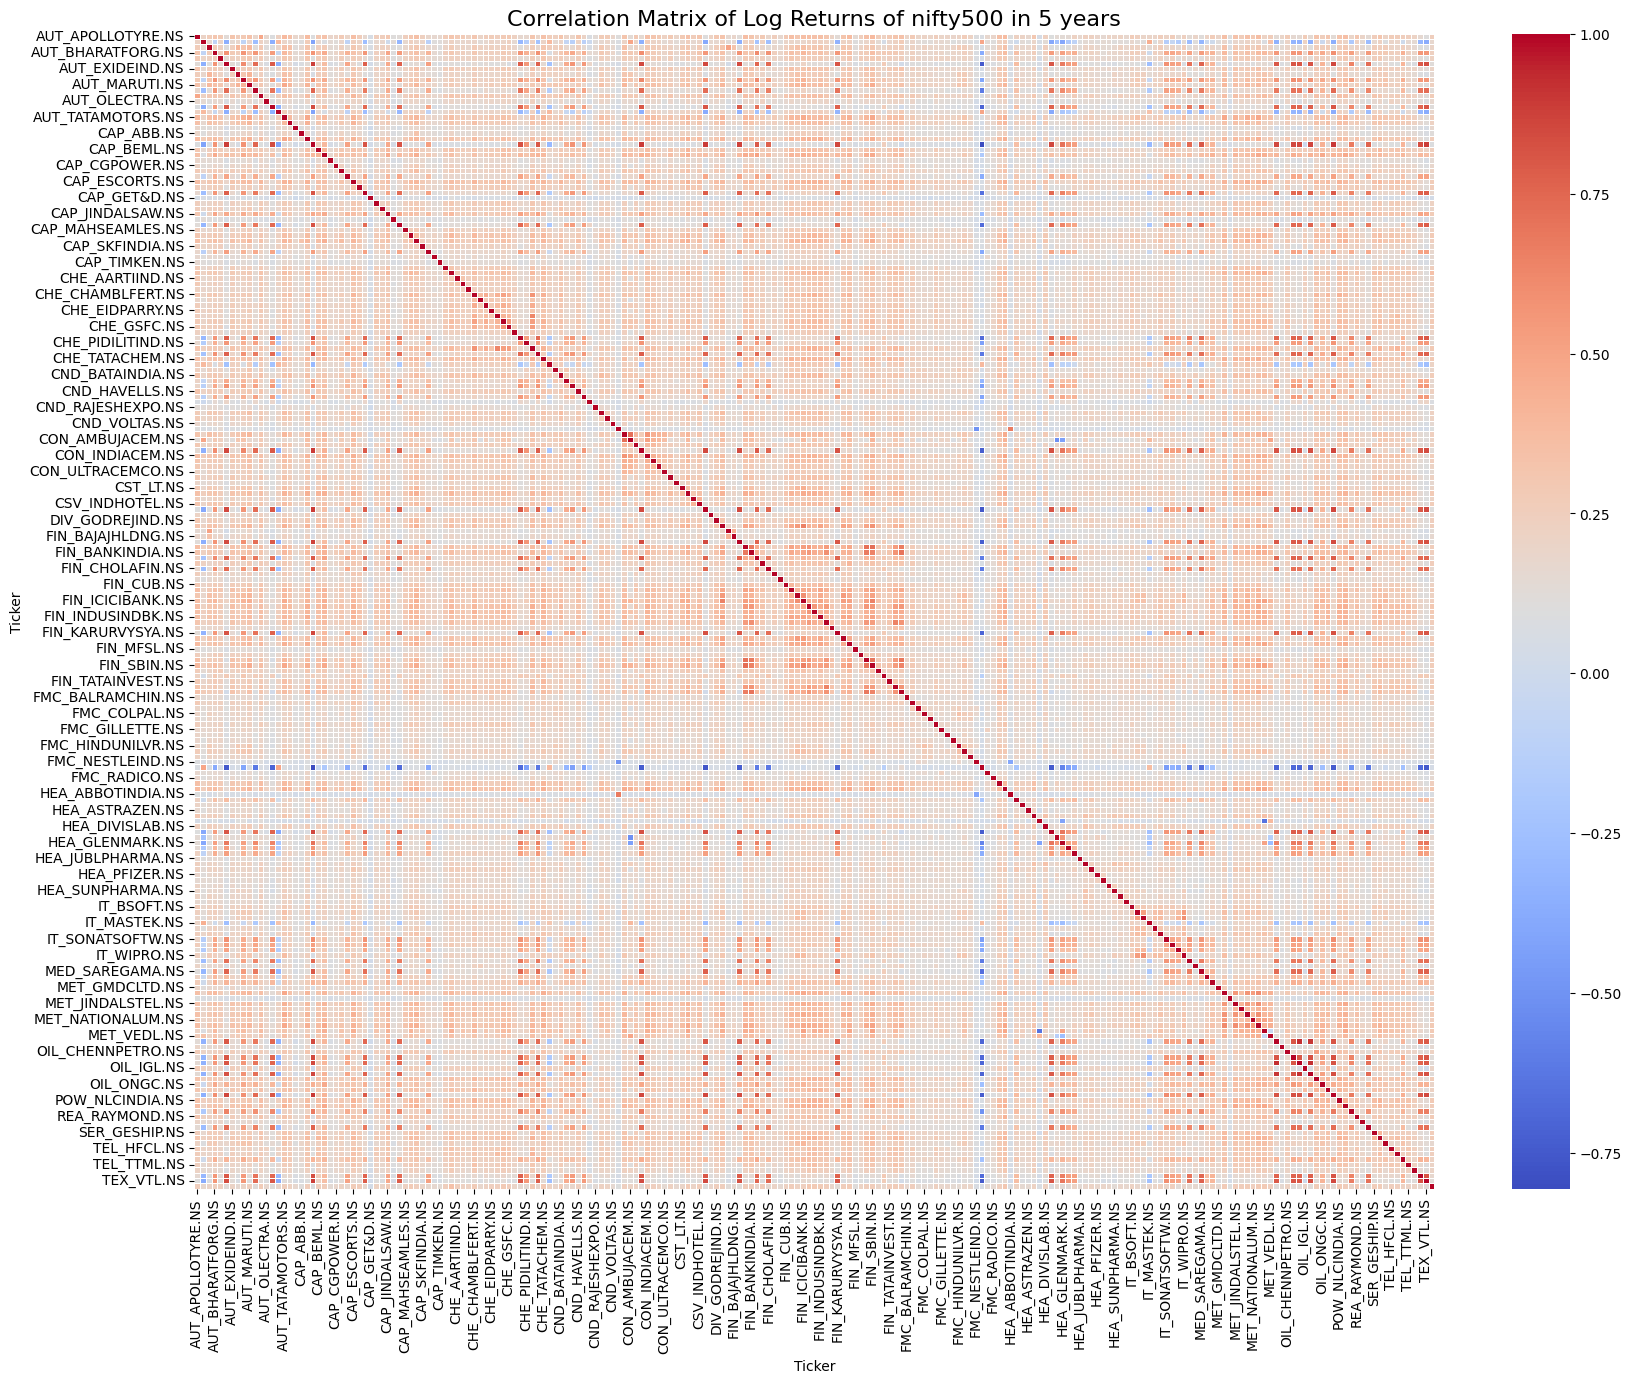

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Log Returns of nifty500 in 5 years", fontsize=16)
plt.savefig('Correlation Matrix of Log Returns of nifty500 in 5 years.png')
plt.show()

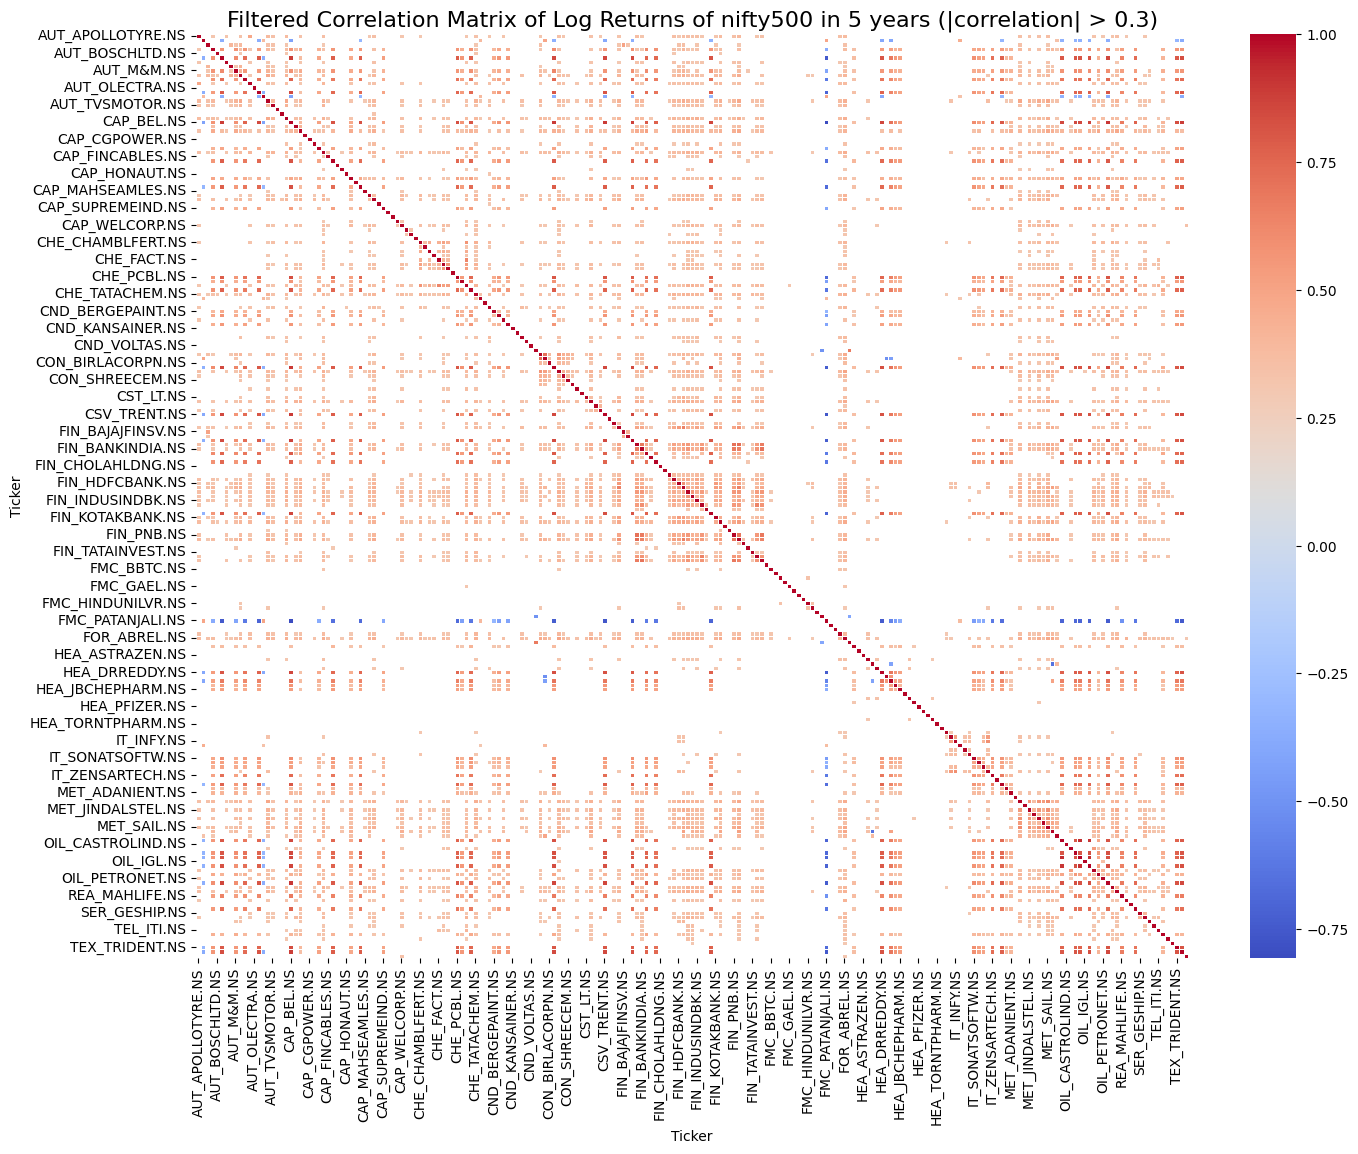

In [10]:
# Only display correlations with absolute values above 0.3
filtered_correlation = correlation_matrix[(correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)]

plt.figure(figsize=(16,12))
sns.heatmap(filtered_correlation, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Filtered Correlation Matrix of Log Returns of nifty500 in 5 years (|correlation| > 0.3)", fontsize=16)
plt.savefig('Filtered Correlation Matrix of Log Returns of nifty500 in 5 years.png')
plt.show()


In [11]:
import networkx as nx

# Set a correlation threshold
threshold = 0.3

# Initialize an empty graph
G = nx.Graph()

# Add nodes to the graph (each stock ticker)
for ticker in correlation_matrix.columns:
    G.add_node(ticker)

# Add edges based on the threshold, with correlation as the weight
for i, stock1 in enumerate(correlation_matrix.columns):
    for j, stock2 in enumerate(correlation_matrix.columns):
        # Only consider each pair once and avoid self-loops
        if i < j:
            corr_value = correlation_matrix.loc[stock1, stock2]
            # Only add edge if correlation is below the threshold
            if abs(corr_value) < threshold:
                G.add_edge(stock1, stock2, weight=corr_value)

# Now G is a graph with nodes as stocks and edges for low-correlation pairs
# Print some info about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 215
Number of edges: 19268


In [12]:
import community as community_louvain  # The python-louvain package

# Apply Louvain method on the graph
partition = community_louvain.best_partition(G, weight='weight')

# Organize nodes into clusters
clusters = {}
for node, cluster_id in partition.items():
    if cluster_id not in clusters:
        clusters[cluster_id] = []
    clusters[cluster_id].append(node)

# Display the clusters
print(f"Number of clusters found: {len(clusters)}")
for cluster_id, stocks in clusters.items():
    print(f"Cluster {cluster_id}: {stocks}")

Number of clusters found: 3
Cluster 0: ['AUT_APOLLOTYRE.NS', 'AUT_ASAHIINDIA.NS', 'AUT_BAJAJ-AUTO.NS', 'AUT_BHARATFORG.NS', 'AUT_BOSCHLTD.NS', 'AUT_EXIDEIND.NS', 'AUT_M&M.NS', 'AUT_MARUTI.NS', 'AUT_OLECTRA.NS', 'AUT_SUNDRMFAST.NS', 'AUT_TVSMOTOR.NS', 'CAP_BHEL.NS', 'CAP_CGPOWER.NS', 'CAP_CUMMINSIND.NS', 'CAP_FINCABLES.NS', 'CAP_GET&D.NS', 'CAP_GRAPHITE.NS', 'CAP_JINDALSAW.NS', 'CAP_MAHSEAMLES.NS', 'CAP_TIMKEN.NS', 'CAP_USHAMART.NS', 'CHE_AARTIIND.NS', 'CHE_ATUL.NS', 'CHE_CHAMBLFERT.NS', 'CHE_COROMANDEL.NS', 'CHE_DEEPAKFERT.NS', 'CHE_EIDPARRY.NS', 'CHE_FACT.NS', 'CHE_GSFC.NS', 'CHE_UPL.NS', 'CND_BATAINDIA.NS', 'CND_HAVELLS.NS', 'CND_TITAN.NS', 'CND_VIPIND.NS', 'CND_WHIRLPOOL.NS', 'CON_BIRLACORPN.NS', 'CON_RAMCOCEM.NS', 'CON_SHREECEM.NS', 'CST_ENGINERSIN.NS', 'CST_LT.NS', 'CSV_INDHOTEL.NS', 'DIV_GODREJIND.NS', 'FIN_CANBK.NS', 'FIN_CANFINHOME.NS', 'FIN_CUB.NS', 'FIN_HDFCBANK.NS', 'FIN_J&KBANK.NS', 'FIN_PEL.NS', 'FIN_PNB.NS', 'FIN_SHRIRAMFIN.NS', 'FIN_TATAINVEST.NS', 'FIN_UNIONBANK.NS', 'F

In [13]:
# Analyzing Cluster Properties

# Create a DataFrame to analyze cluster properties
cluster_analysis = pd.DataFrame({
    'Stock': log_returns.columns,
    'Cluster': [partition[stock] for stock in log_returns.columns]
})

# Add sector information for each stock
cluster_analysis['Sector'] = cluster_analysis['Stock'].apply(lambda x: x.split('_')[0])

# Display the cluster distribution
cluster_distribution = cluster_analysis['Cluster'].value_counts().sort_index()
print("Cluster Distribution:")
print(cluster_distribution)

Cluster Distribution:
Cluster
0     82
1     22
2    111
Name: count, dtype: int64


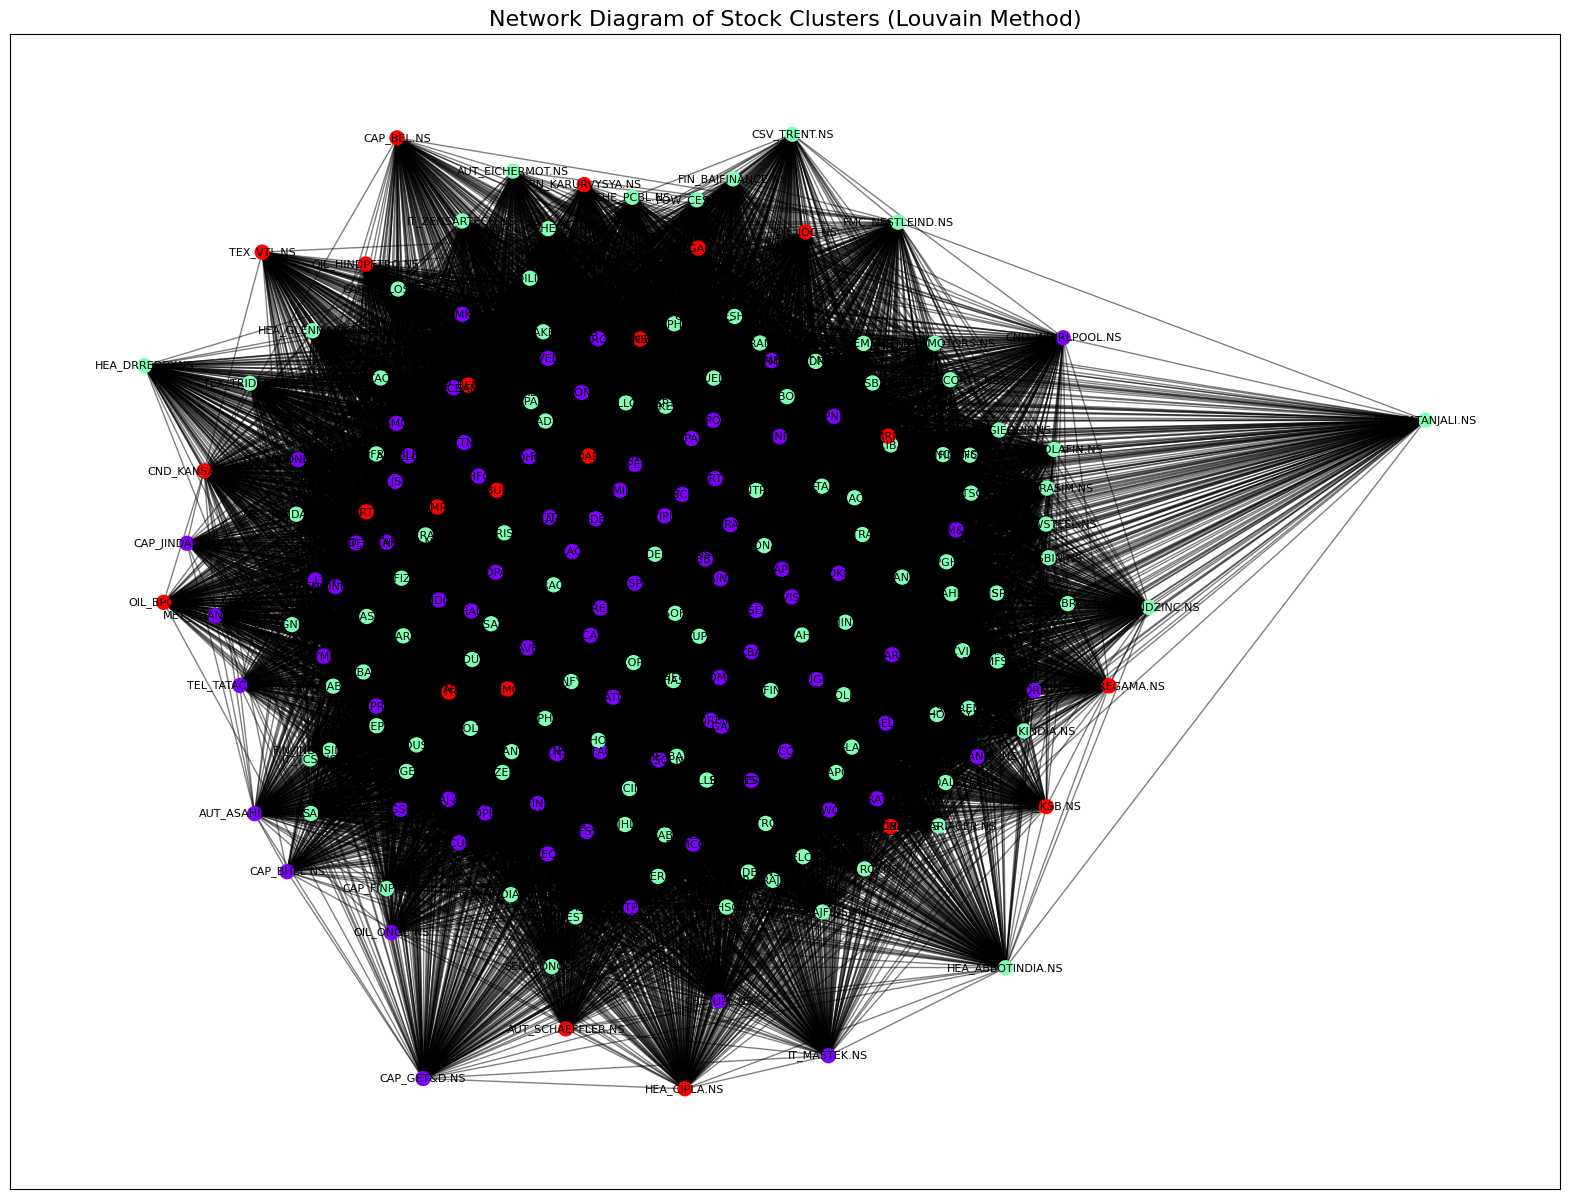

In [14]:
# Visualizing Clusters of Stocks Identified by Louvain Algorithm

# Assign cluster colors
color_map = []
cluster_colors = {cluster_id: i for i, cluster_id in enumerate(clusters.keys())}
for node in G.nodes():
    color_map.append(cluster_colors[partition[node]])

# Plot the graph with the clusters
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, seed=42)  # Generate the layout for visualization

# Draw nodes with cluster colors
nx.draw_networkx_nodes(G, pos, node_color=color_map, cmap=plt.cm.rainbow, node_size=100)

# Draw edges with weights below the threshold
edges = [(u, v) for u, v, d in G.edges(data=True) if abs(d['weight']) < threshold]
nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5)

# Add labels for each node
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Network Diagram of Stock Clusters (Louvain Method)", fontsize=16)
plt.show()

In [15]:
# Calculate the average log returns and volatility for each cluster
cluster_returns = {}
cluster_volatility = {}

for cluster_id, stocks in clusters.items():
    cluster_data = log_returns[stocks]
    cluster_returns[cluster_id] = cluster_data.mean().mean()  # Mean return of the cluster
    cluster_volatility[cluster_id] = cluster_data.std().mean()  # Average volatility of the cluster

# Create a DataFrame to summarize cluster statistics
cluster_summary = pd.DataFrame({
    'Cluster': list(clusters.keys()),
    'Average Return': [cluster_returns[cl] for cl in clusters.keys()],
    'Average Volatility': [cluster_volatility[cl] for cl in clusters.keys()],
    'Number of Stocks': [len(clusters[cl]) for cl in clusters.keys()]
})

cluster_summary.sort_values(by='Average Return', ascending=False, inplace=True)
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
   Cluster  Average Return  Average Volatility  Number of Stocks
1        2        0.000704            0.030851               111
0        0        0.000663            0.028632                82
2        1        0.000599            0.038760                22


In [16]:
# Selecting Clusters for Portfolio Construction

# Display top clusters by average return
selected_clusters = cluster_summary.head(3)  # Select top 3 clusters with highest average return
print("Selected Clusters for Portfolio Construction:")
print(selected_clusters)

Selected Clusters for Portfolio Construction:
   Cluster  Average Return  Average Volatility  Number of Stocks
1        2        0.000704            0.030851               111
0        0        0.000663            0.028632                82
2        1        0.000599            0.038760                22


C:\Users\gagan\AppData\Local\Temp\ipykernel_14168\3791728488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')


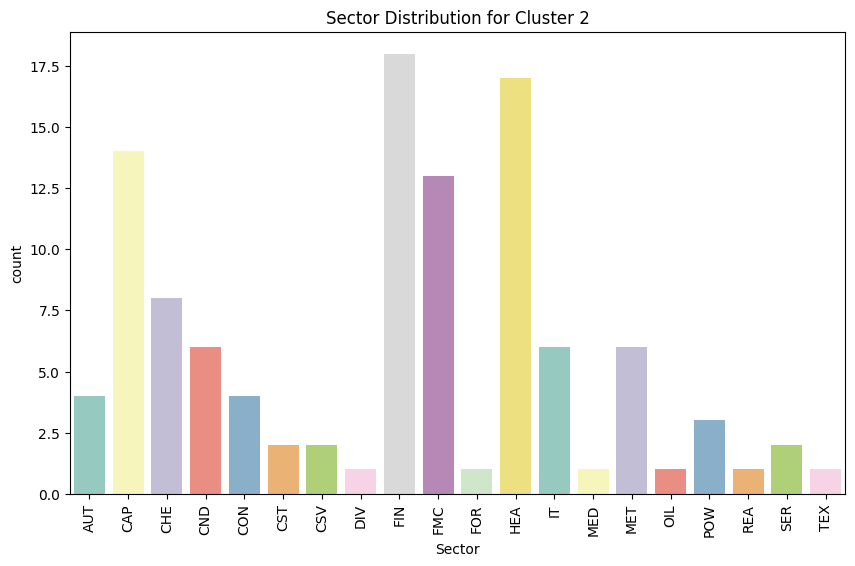

C:\Users\gagan\AppData\Local\Temp\ipykernel_14168\3791728488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')


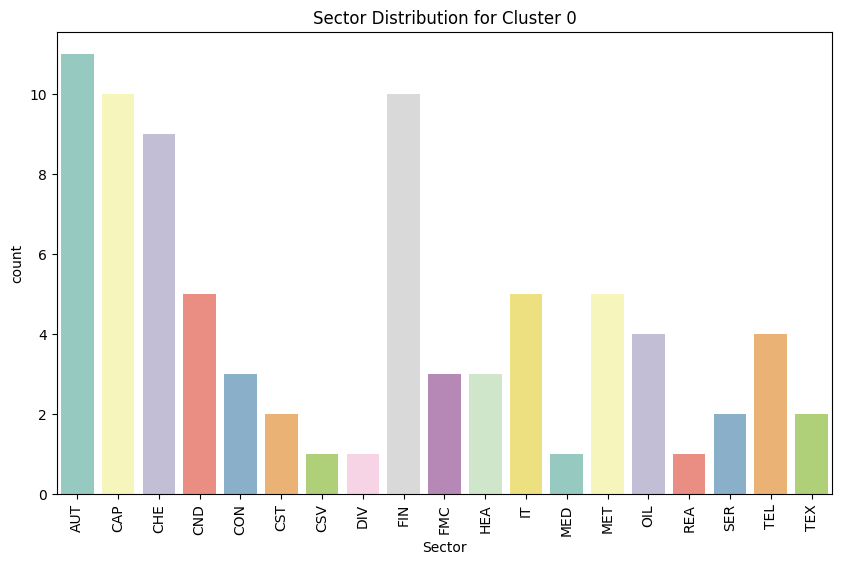

C:\Users\gagan\AppData\Local\Temp\ipykernel_14168\3791728488.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')


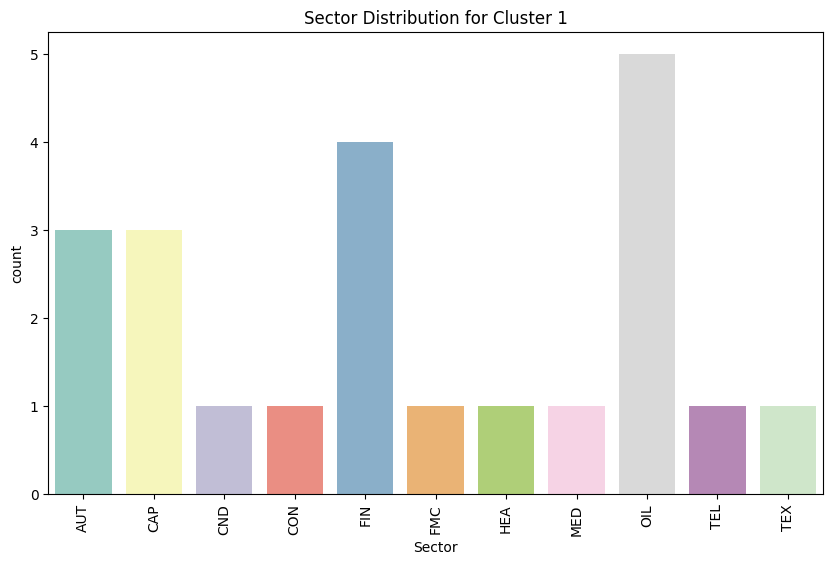

In [17]:
# Visualizing Sector Distribution in Selected Clusters

import seaborn as sns

for cluster_id in selected_clusters['Cluster']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cluster_analysis[cluster_analysis['Cluster'] == cluster_id], x='Sector', palette='Set3')
    plt.title(f"Sector Distribution for Cluster {cluster_id}")
    plt.xticks(rotation=90)
    plt.show()

## Portfolio Construction and Backtesting of Selected Clusters

In [18]:
# Load the log returns data
log_returns = pd.read_csv("log_returns.csv", index_col=0, parse_dates=True)

# Define the selected clusters for portfolio construction
selected_clusters = [0, 1, 2]  # Replace with actual cluster IDs from previous analysis

# Get stocks for each selected cluster
selected_stocks = [stock for cluster_id in selected_clusters for stock in clusters[cluster_id]]
selected_log_returns = log_returns[selected_stocks]

# Equal weight allocation for simplicity
weights = np.ones(len(selected_stocks)) / len(selected_stocks)

# Calculate the portfolio's daily returns
portfolio_returns = selected_log_returns.dot(weights)

# Cumulative portfolio returns
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod()

# Load benchmark data (Nifty 500 index)
benchmark = yf.download("^CRSLDX", start="2004-04-01", end="2024-03-31")["Close"].pct_change().dropna()
cumulative_benchmark_returns = (1 + benchmark).cumprod()

[*********************100%***********************]  1 of 1 completed


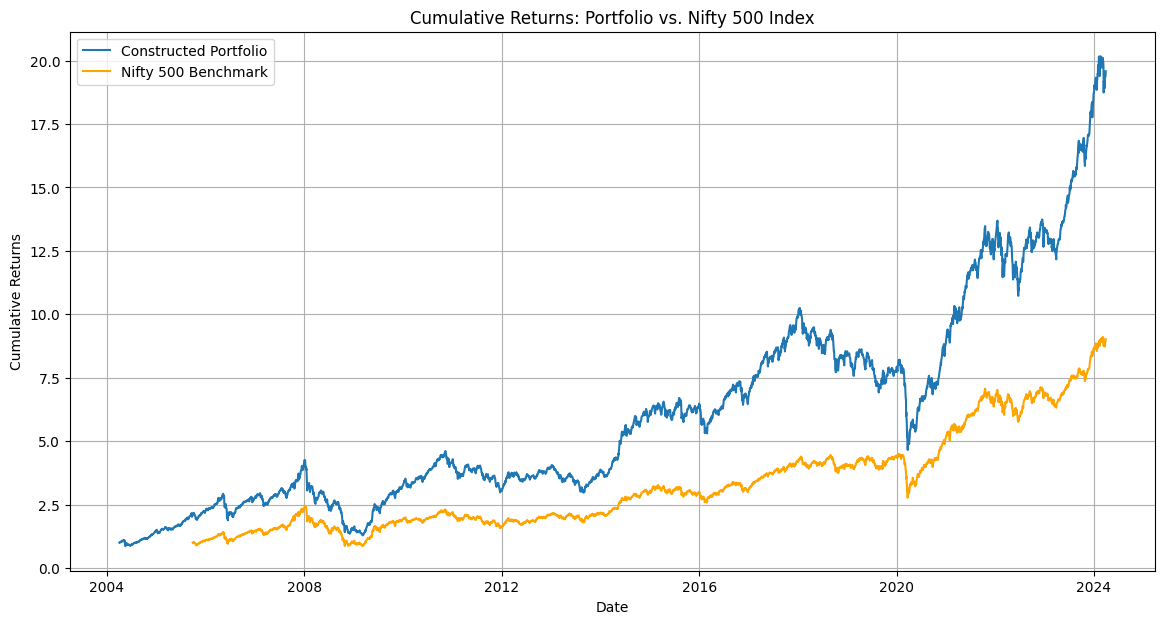

In [19]:
# Plotting cumulative returns for the portfolio and the benchmark
plt.figure(figsize=(14, 7))
plt.plot(cumulative_portfolio_returns, label="Constructed Portfolio")
plt.plot(cumulative_benchmark_returns, label="Nifty 500 Benchmark", color='orange')
plt.title("Cumulative Returns: Portfolio vs. Nifty 500 Index")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Calculate annualized return and volatility for the portfolio
annualized_return = portfolio_returns.mean() * 252
annualized_volatility = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

print("Portfolio Performance Metrics:")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Calculate benchmark performance metrics
benchmark_annualized_return = benchmark.mean() * 252
benchmark_annualized_volatility = benchmark.std() * np.sqrt(252)
benchmark_sharpe_ratio = benchmark_annualized_return / benchmark_annualized_volatility

print("\nBenchmark Performance Metrics:")
print(f"Annualized Return: {benchmark_annualized_return:.2%}")
print(f"Annualized Volatility: {benchmark_annualized_volatility:.2%}")
print(f"Sharpe Ratio: {benchmark_sharpe_ratio:.2f}")

Portfolio Performance Metrics:
Annualized Return: 17.24%
Annualized Volatility: 20.03%
Sharpe Ratio: 0.86

Benchmark Performance Metrics:
Annualized Return: 14.39%
Annualized Volatility: 20.97%
Sharpe Ratio: 0.69


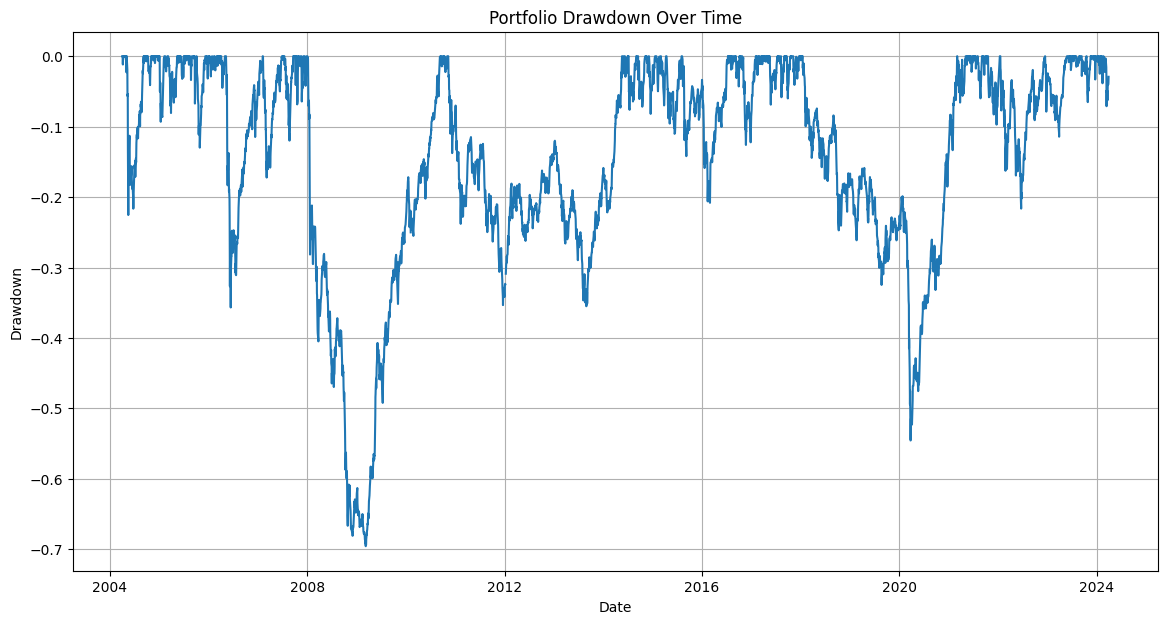

In [21]:
# Visualize the drawdowns of the portfolio
cumulative_max_portfolio = cumulative_portfolio_returns.cummax()
drawdown = (cumulative_portfolio_returns - cumulative_max_portfolio) / cumulative_max_portfolio

plt.figure(figsize=(14, 7))
plt.plot(drawdown, label="Portfolio Drawdown")
plt.title("Portfolio Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.grid(True)
plt.show()

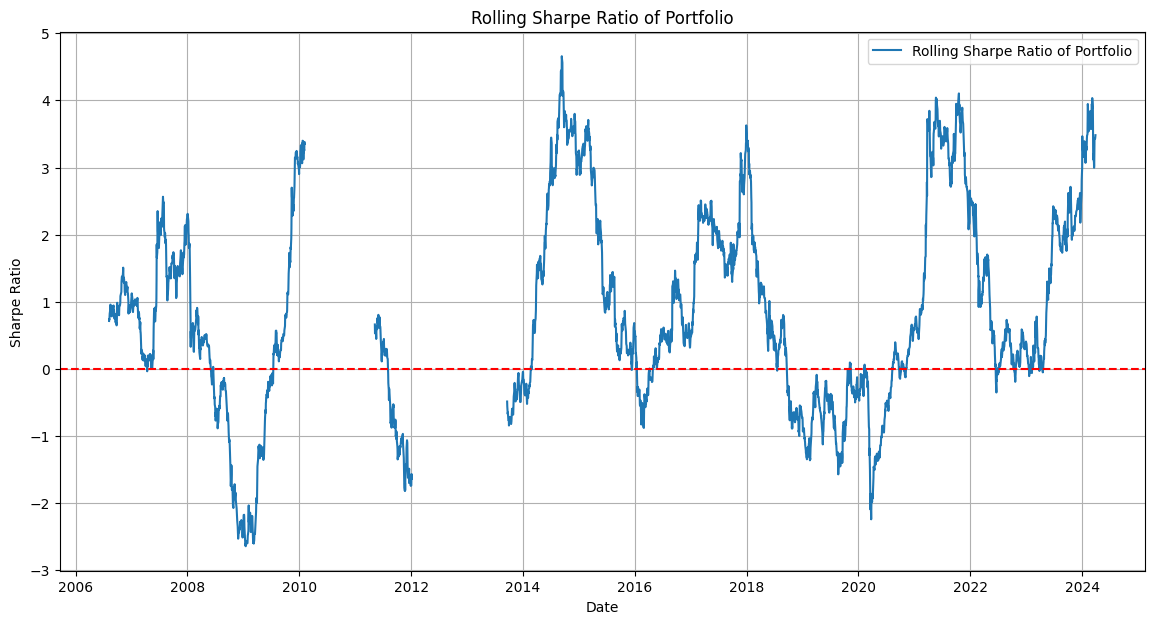

In [22]:
rolling_window = 252  # One year
rolling_sharpe_ratio = portfolio_returns.rolling(rolling_window).mean() / portfolio_returns.rolling(rolling_window).std() * np.sqrt(252)

plt.figure(figsize=(14, 7))
plt.plot(rolling_sharpe_ratio, label="Rolling Sharpe Ratio of Portfolio")
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Rolling Sharpe Ratio of Portfolio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.grid(True)
plt.show()